In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [170]:
model_df = pd.read_pickle(r"../Model_vars.pkl")
model_df = model_df.rolling(5, min_periods=1).mean()

model_df.head()

,ask,bid,tech_optimists,tech_pessimists,price,nf,technical_fraction,slope
0,1.000000,1.000000,6.0,4.0,10.000000,490.0,0.0200,0.000000
1,128.500000,122.500000,6.5,4.0,10.000000,489.5,0.0210,0.000000
2,170.666667,163.333333,7.0,4.0,10.003333,489.0,0.0220,0.000000
3,190.250000,185.250000,7.5,4.0,10.007500,488.5,0.0230,0.050000
4,154.000000,246.400000,7.8,4.0,10.008000,488.2,0.0236,0.106667


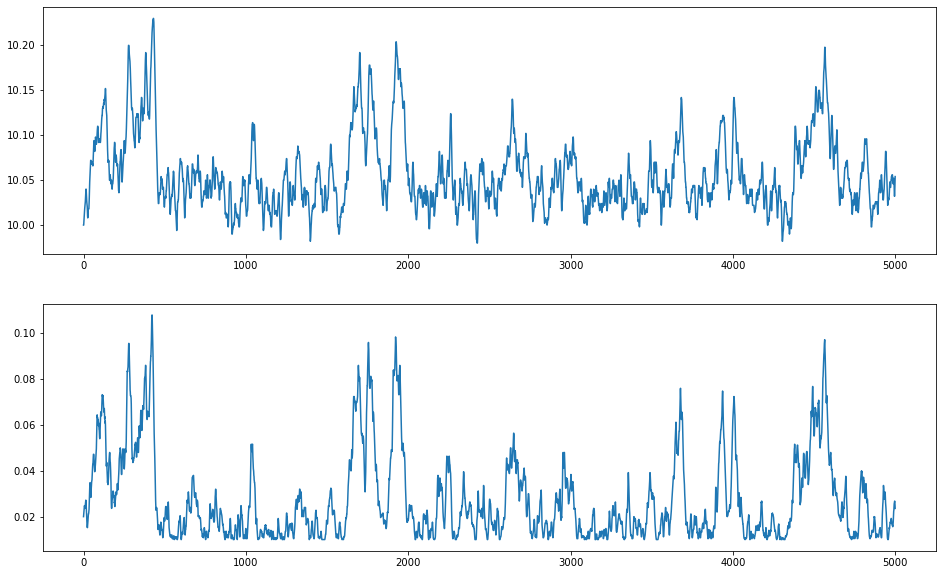

In [171]:
fig , ax = plt.subplots(2,1, figsize=(16, 10))

ax[0].plot(model_df.price)

ax[1].plot(model_df.technical_fraction)


In [172]:
tc = 0.2
edt = (model_df.tech_optimists - model_df.tech_pessimists) * tc  # excess technical demand
gamma = 0.1
pf = 10
edf = model_df.nf * gamma * (pf - model_df.price)

model_df["edt"] = edt
model_df["edf"] = edf
model_df["ed"]  = edt + edf

model_df.head()

,ask,bid,tech_optimists,tech_pessimists,price,nf,technical_fraction,slope,edt,edf,ed
0,1.000000,1.000000,6.0,4.0,10.000000,490.0,0.0200,0.000000,0.40,0.000000,0.400000
1,128.500000,122.500000,6.5,4.0,10.000000,489.5,0.0210,0.000000,0.50,0.000000,0.500000
2,170.666667,163.333333,7.0,4.0,10.003333,489.0,0.0220,0.000000,0.60,-0.163000,0.437000
3,190.250000,185.250000,7.5,4.0,10.007500,488.5,0.0230,0.050000,0.70,-0.366375,0.333625
4,154.000000,246.400000,7.8,4.0,10.008000,488.2,0.0236,0.106667,0.76,-0.390560,0.369440


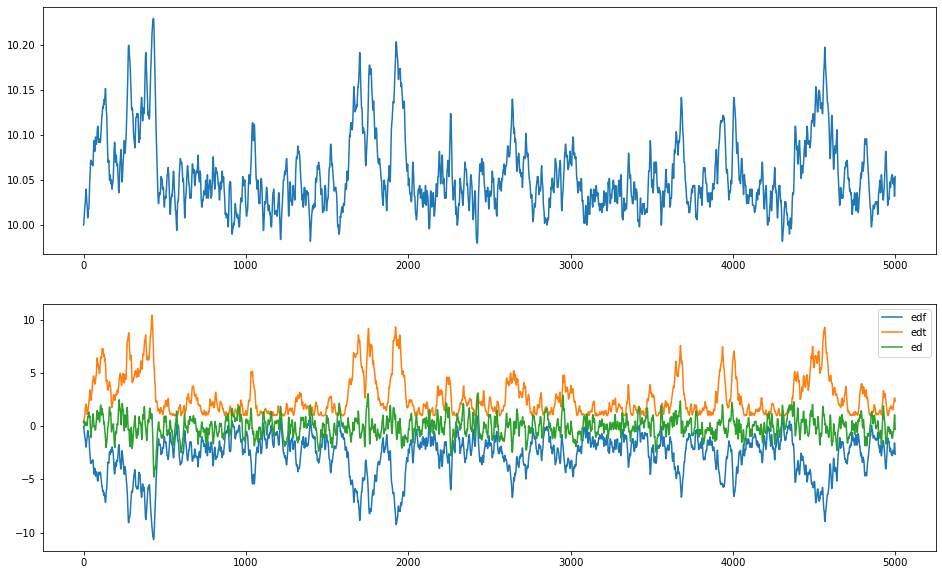

In [173]:
fig , ax = plt.subplots(2,1, figsize=(16, 10))

ax[0].plot(model_df.price)
ax[1].plot(model_df.edf, label="edf")
ax[1].plot(model_df.edt, label="edt")
ax[1].plot(model_df.ed, label="ed")
ax[1].legend()

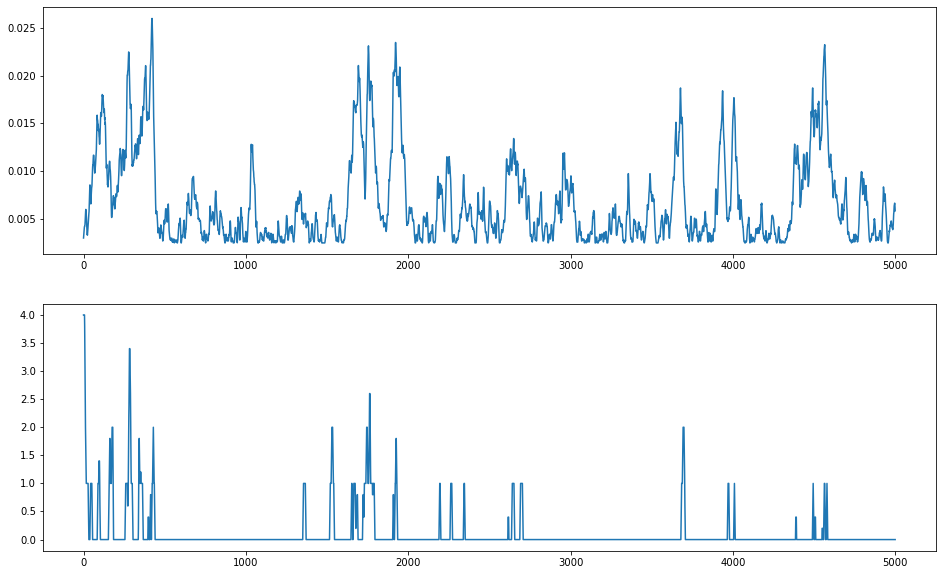

In [174]:
r = 0.004
v2 = 10
R = 0.0004
s= 0.75
a3 = 2
N = 200
DT = 0.01

ept = (r + model_df.slope / v2) / model_df.price - R
epf = s * abs((model_df.price - pf) / model_df.price)

U = a3 * (ept - epf)
p_transition = v2 * model_df.tech_optimists / N * np.exp(U) * DT

fig, ax = plt.subplots(2, 1, figsize=(16,10))
ax[0].plot(p_transition)
ax[1].plot(model_df.tech_pessimists)